<a href="https://colab.research.google.com/github/tlhhogi123/EDA-/blob/main/Copy_of_notebookf4d62d31a6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Project 2 Level 2 (Letlhogonolo)

# **Wine Quality Prediction Project**

This project predicts the quality of wine based on its chemical characteristics, applying machine learning tecnhiques in viticulture. By leveraging advanced classifiers like Random Forest, Stochastic Gradient Descent and Support Vector Classifier (SVC), this project demonstrates how chemical attributes such as acidity and density influence wine quality.

# **Dataset**

the dataset includes a diverse range of chemical attributes such as:


*   Fixed acidity
*   Volatile acidity
*   Citric acid
*   Residual sugar
*   Chlorides
*   Free suldur dioxide
*   Total sulfur dioxide
*   Density
*   pH
*   Sulphates
*   Alcohol











In [ ]:
!pip install Xgboost

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Dataset
# The dataset includes chemical properties like fixed acidity, volatile acidity, citric acidity, residual sugar, density, pH etc and quality as the target label.
df = pd.read_csv('WineQT.csv')

# Update with the actual dataset path

# **Exploratory Data Analysis**


In [ ]:
# Check for missing values
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [ ]:
# Summary Statistics
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


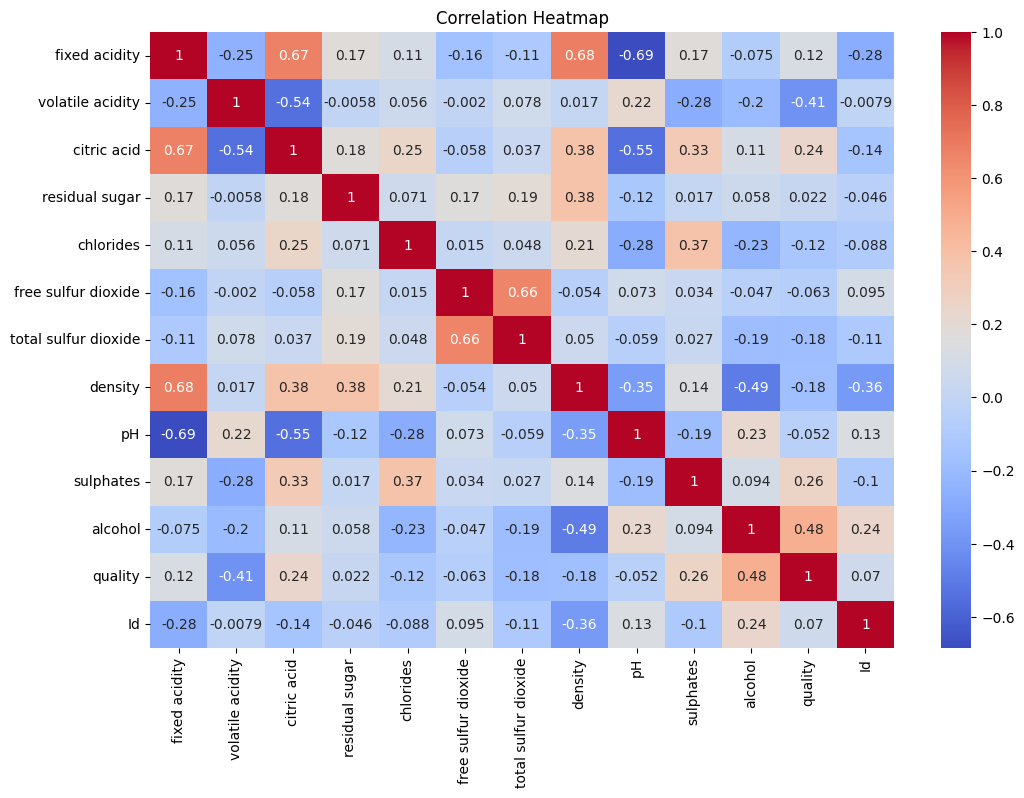

In [ ]:
# Feature Correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

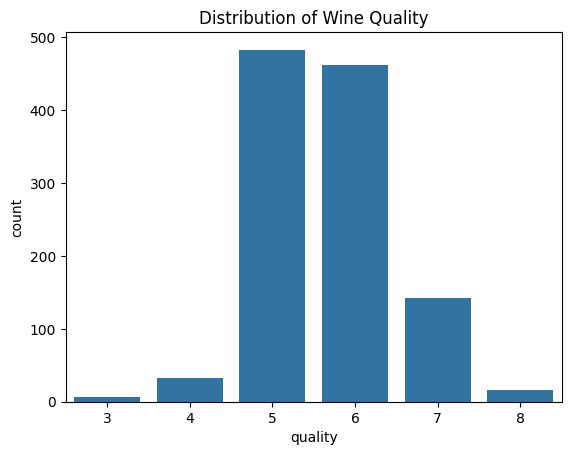

In [ ]:
# Class Distribution
sns.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.show()

**Data Processing**

In [ ]:
# Split dataset into features and target variabe:
X = df.drop('quality', axis=1)
y = df['quality']

In [ ]:
# Normalize features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Train-test split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Model Training and Evaluation**

In [ ]:
# Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred_rf = rf_model.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, rf_pred_rf))

Random Forest Classifier:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.69      0.76      0.72       143
           6       0.64      0.65      0.64       146
           7       0.67      0.54      0.59        41
           8       1.00      0.25      0.40         4

    accuracy                           0.66       343
   macro avg       0.60      0.44      0.47       343
weighted avg       0.65      0.66      0.65       343



In [ ]:
# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier()
sgd_model.fit(X_train, y_train)
sgd_pred_sgd = sgd_model.predict(X_test)
print("SGD Performance:")
print(classification_report(y_test, sgd_pred_sgd))


SGD Performance:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.08      0.22      0.12         9
           5       0.67      0.58      0.62       143
           6       0.52      0.66      0.58       146
           7       0.33      0.07      0.12        41
           8       0.00      0.00      0.00         4

    accuracy                           0.54       343
   macro avg       0.27      0.26      0.24       343
weighted avg       0.54      0.54      0.53       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [ ]:
# Support Vector Classifier
svc_model = SVC()
svc_model.fit(X_train, y_train)
svc_pred_svc = svc_model.predict(X_test)
print("SVC Performance:")
print(classification_report(y_test, svc_pred_svc))

SVC Performance:
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.68      0.78      0.73       143
           6       0.62      0.68      0.65       146
           7       0.74      0.34      0.47        41
           8       0.00      0.00      0.00         4

    accuracy                           0.66       343
   macro avg       0.41      0.36      0.37       343
weighted avg       0.64      0.66      0.64       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# **Compare Model Performance**

<ipython-input-33-a554e5d72e22>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


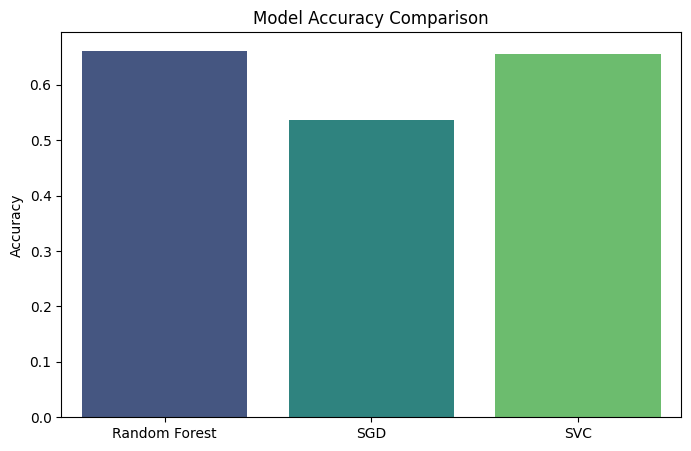

In [ ]:
# Accuracy Comparison
rf_accuracy = accuracy_score(y_test, rf_pred_rf)
sgd_accuracy = accuracy_score(y_test, sgd_pred_sgd)
svc_accuracy = accuracy_score(y_test, svc_pred_svc)
models = ['Random Forest', 'SGD', 'SVC']
accuracies = [rf_accuracy, sgd_accuracy, svc_accuracy]
plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


# **Conclusion**

This project provides a comprehensive approach to predicting wine quality using machine learning. It illustrates the importance of chemical attributes and demonstrates how machine learning decision-making in viticulture.